In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Lectura del archivo con la informacion a trabajar optenida de Kaggle
df=pd.read_csv("../data/raw/matches.csv")
df

,Unnamed: 0,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,...,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt,Season,Team
0,0,2023-08-13,16:30,Premier League,Matchweek 1,Sun,Away,D,1.0,1.0,...,Match Report,NaN,13.0,1.0,17.8,0.0,0,0,2024,Liverpool
1,1,2023-08-19,15:00,Premier League,Matchweek 2,Sat,Home,W,3.0,1.0,...,Match Report,NaN,25.0,9.0,16.8,1.0,0,1,2024,Liverpool
2,2,2023-08-27,16:30,Premier League,Matchweek 3,Sun,Away,W,2.0,1.0,...,Match Report,NaN,9.0,4.0,17.2,1.0,0,0,2024,Liverpool
3,3,2023-09-03,14:00,Premier League,Matchweek 4,Sun,Home,W,3.0,0.0,...,Match Report,NaN,17.0,4.0,14.7,0.0,0,0,2024,Liverpool
4,4,2023-09-16,12:30,Premier League,Matchweek 5,Sat,Away,W,3.0,1.0,...,Match Report,NaN,16.0,5.0,15.8,0.0,0,0,2024,Liverpool
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,24,2024-01-30,20:00,Premier League,Matchweek 22,Tue,Away,L,2.0,3.0,...,Match Report,NaN,9.0,5.0,16.5,0.0,0,0,2024,SheffieldUnited
510,25,2024-02-03,17:30,Premier League,Matchweek 23,Sat,Home,L,0.0,5.0,...,Match Report,NaN,10.0,4.0,10.0,0.0,0,0,2024,SheffieldUnited
511,26,2024-02-10,15:00,Premier League,Matchweek 24,Sat,Away,W,3.0,1.0,...,Match Report,NaN,6.0,2.0,22.4,0.0,1,1,2024,SheffieldUnited
512,27,2024-02-18,14:00,Premier League,Matchweek 25,Sun,Home,L,0.0,5.0,...,Match Report,NaN,6.0,1.0,18.7,0.0,0,0,2024,SheffieldUnited


In [4]:
df.columns


Index(['Unnamed: 0', 'Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result',
       'GF', 'GA', 'Opponent', 'xG', 'xGA', 'Poss', 'Attendance', 'Captain',
       'Formation', 'Referee', 'Match Report', 'Notes', 'Sh', 'SoT', 'Dist',
       'FK', 'PK', 'PKatt', 'Season', 'Team'],
      dtype='object')

In [5]:
df.nunique()

Unnamed: 0       39
Date             82
Time             12
Comp              1
Round            26
Day               7
Venue             2
Result            3
GF                8
GA                8
Opponent         20
xG               43
xGA              43
Poss             61
Attendance      248
Captain          60
Formation        17
Referee          26
Match Report      1
Notes             0
Sh               32
SoT              15
Dist            115
FK                4
PK                3
PKatt             3
Season            1
Team             20
dtype: int64

In [6]:
#Dimension de los datos
df.shape

(514, 28)

In [7]:
#Tipos de datos
dtypes = pd.DataFrame(df.dtypes, columns=['Tipo'])
dtypes

,Tipo
Unnamed: 0,int64
Date,object
Time,object
Comp,object
Round,object
Day,object
Venue,object
Result,object
GF,float64
GA,float64


In [8]:
#Valores nulos
missing = pd.DataFrame(df.isnull().sum(),columns=['Valores_Nulos'])
missing

,Valores_Nulos
Unnamed: 0,0
Date,0
Time,0
Comp,0
Round,0
Day,0
Venue,0
Result,0
GF,0
GA,0


In [9]:
#Al observar que la variable "Notes" es una columna vacía y no nos aportara en nada para dar información esta se elimina.
df = df.drop('Notes', axis=1)
df.shape

(514, 27)

In [10]:
#Al igual vemos que la variable Attendance tiene 2 valores nullos, estos se eliminaran ya que, si existen o no, no afecta la distribución de los datos por ser tan pocos.
df = df.dropna()
df.shape

(512, 27)

In [11]:
#valores únicos
unival = pd.DataFrame(df.nunique(), columns=['Valores_Unicos'])
unival

,Valores_Unicos
Unnamed: 0,39
Date,82
Time,12
Comp,1
Round,26
Day,7
Venue,2
Result,3
GF,8
GA,8


In [12]:
df.shape
#valores únicos
unival = pd.DataFrame(df.nunique(), columns=['Valores_Unicos'])
unival

,Valores_Unicos
Unnamed: 0,39
Date,82
Time,12
Comp,1
Round,26
Day,7
Venue,2
Result,3
GF,8
GA,8


In [13]:
#Visualizar todo junto
def reporte(df):
    dtyp = pd.DataFrame(df.dtypes, columns=['Tipo'])
    missing = pd.DataFrame(df.isnull().sum(), columns=['Valores_Nulos'])
    unival = pd.DataFrame(df.nunique(), columns=['Valores_Unicos'])
    maximo = pd.DataFrame(df.max(), columns=['Max'])
    minimo = pd.DataFrame(df.min(), columns=['Min'])
    return dtyp.join(missing).join(unival).join(maximo).join(minimo)
reporte(df)

,Tipo,Valores_Nulos,Valores_Unicos,Max,Min
Unnamed: 0,int64,0,39,38,0
Date,object,0,82,2024-02-25,2023-08-11
Time,object,0,12,20:15,12:30
Comp,object,0,1,Premier League,Premier League
Round,object,0,26,Matchweek 9,Matchweek 1
Day,object,0,7,Wed,Fri
Venue,object,0,2,Home,Away
Result,object,0,3,W,D
GF,float64,0,8,8.0,0.0
GA,float64,0,8,8.0,0.0


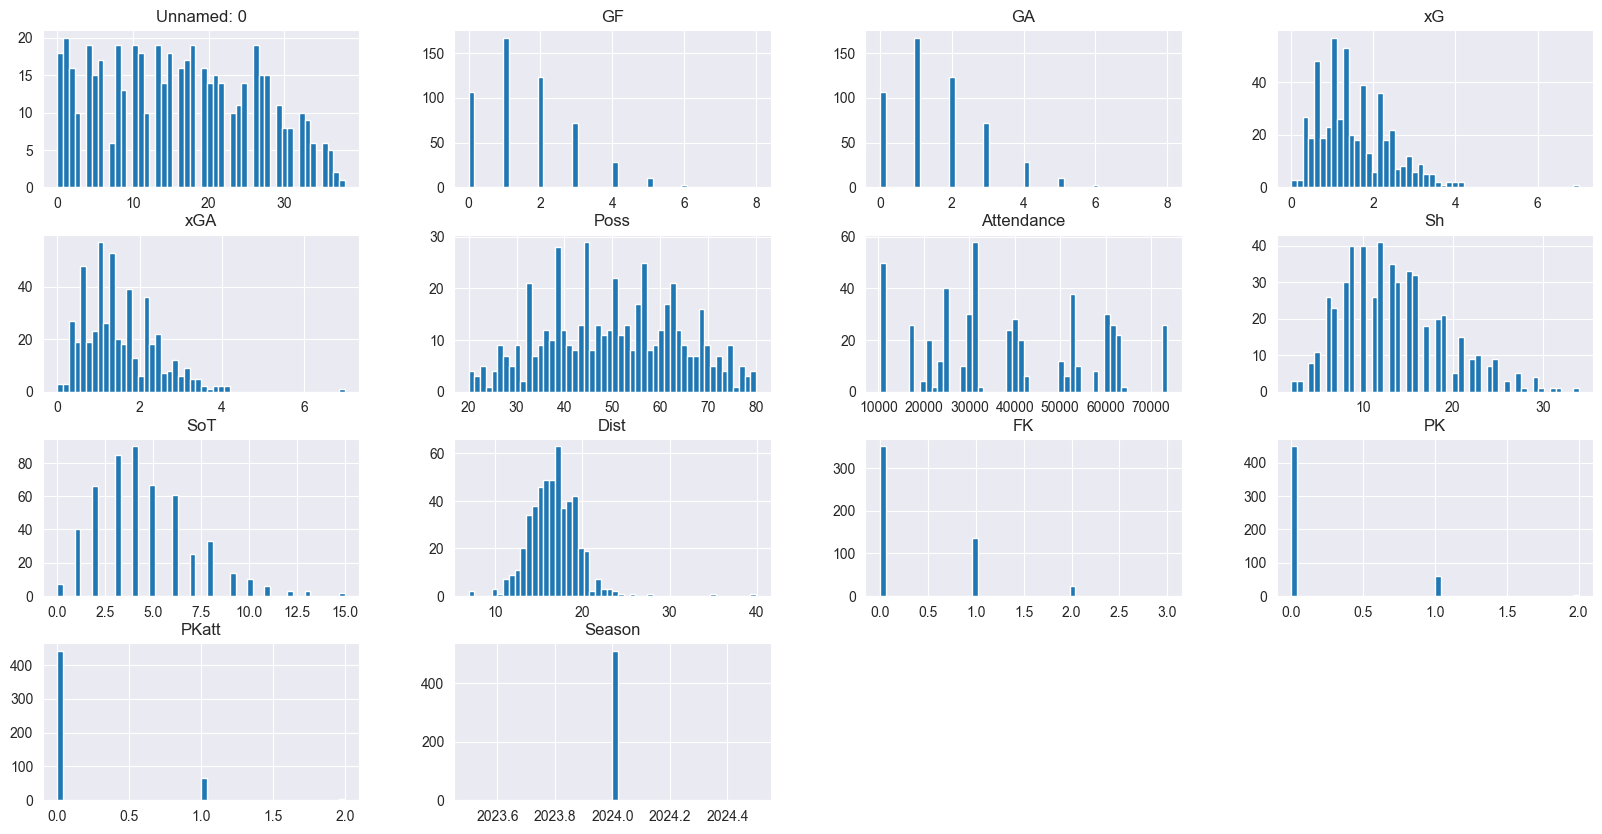

In [14]:
#Histogramas
df.hist(bins=50,figsize=(20,10))
plt.show()

En nuestras visualizaciones anteriores observamos la frecuencia en la que cada dato en cada categoría es usada.

In [15]:
df_numerico = df.select_dtypes(include=['number'])

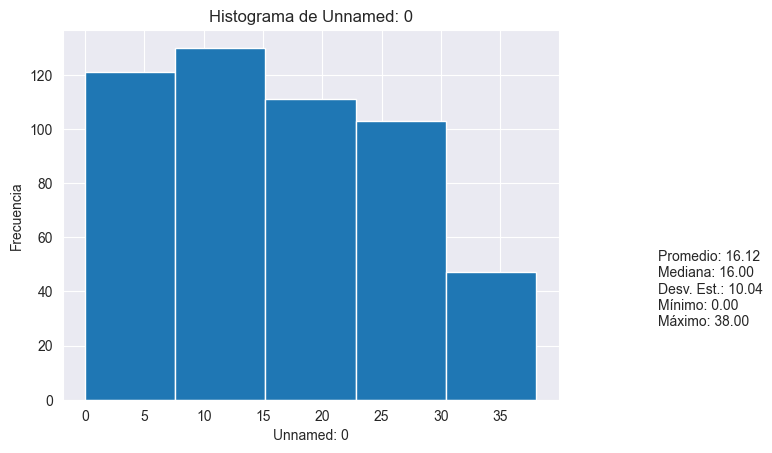

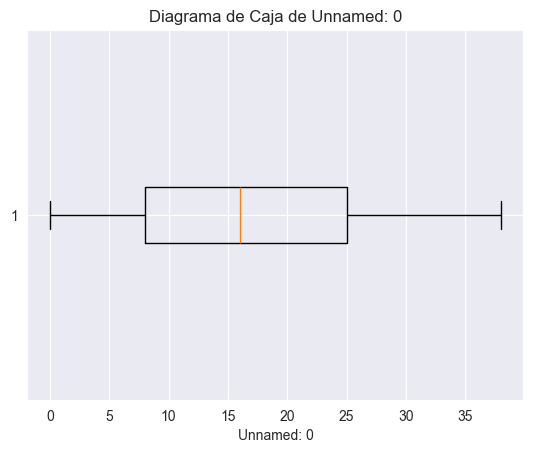

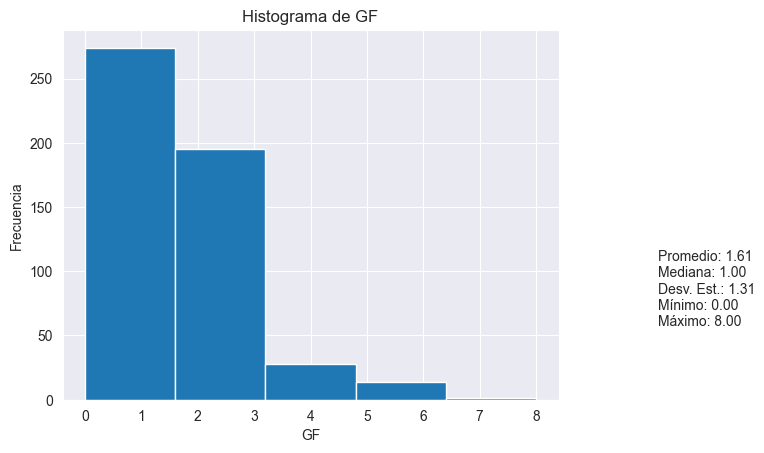

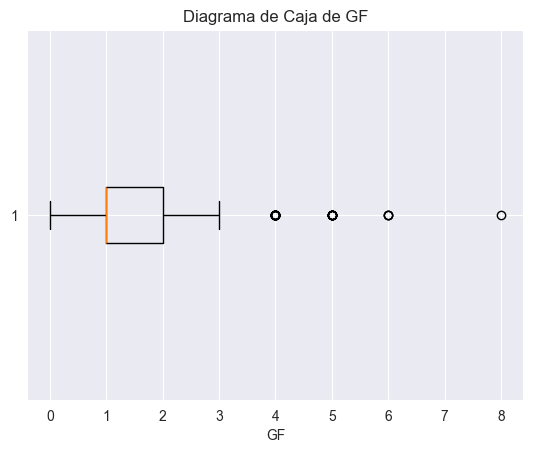

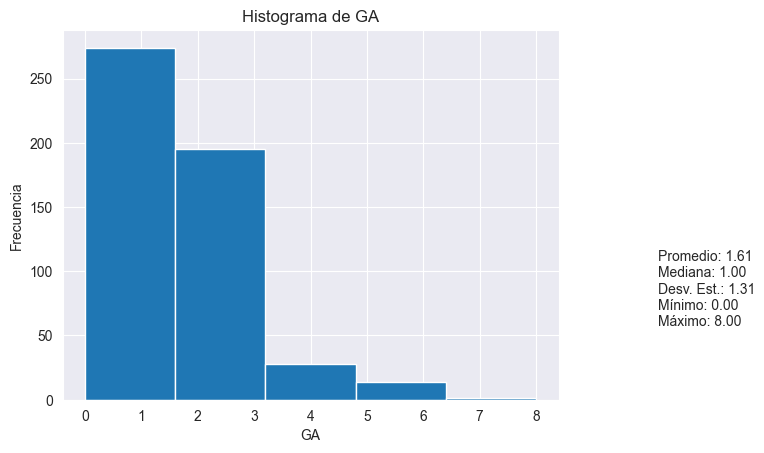

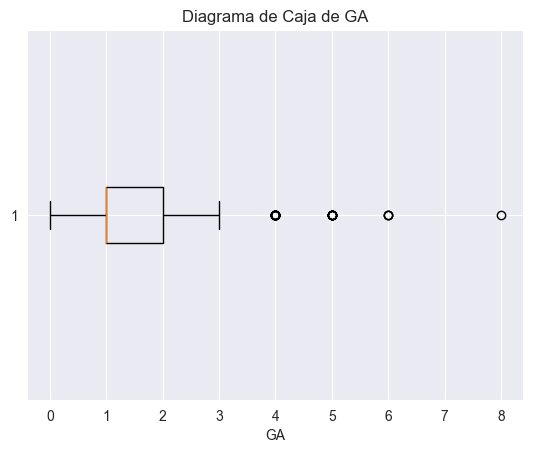

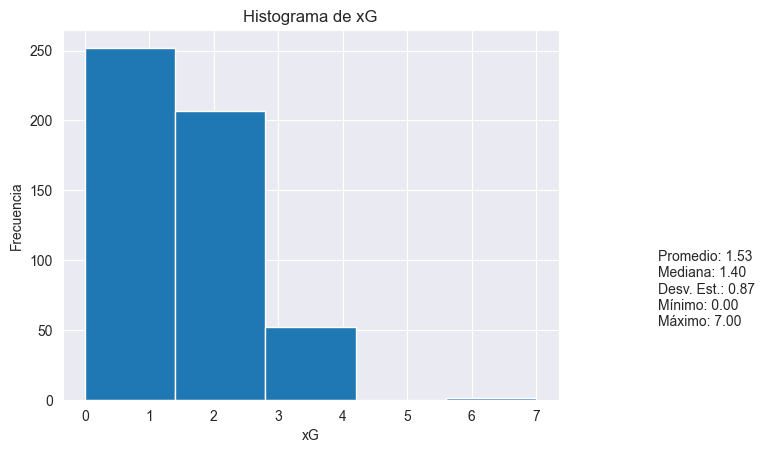

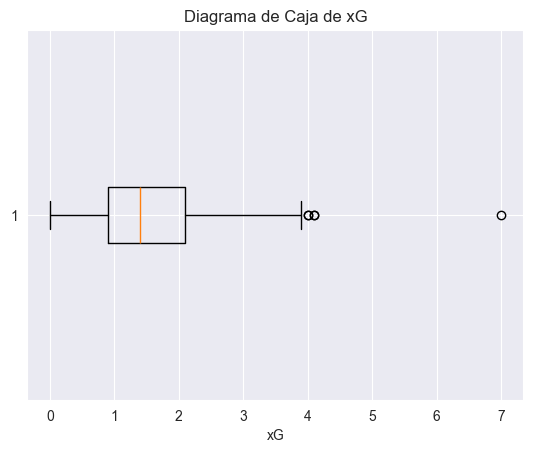

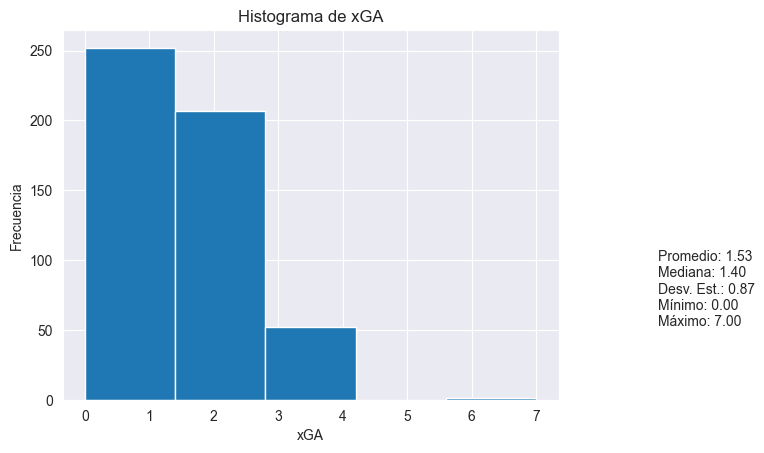

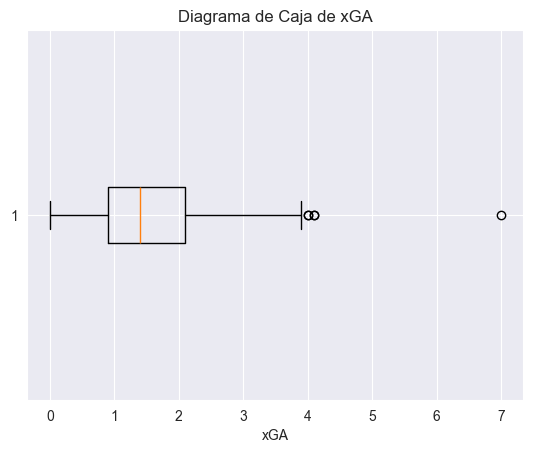

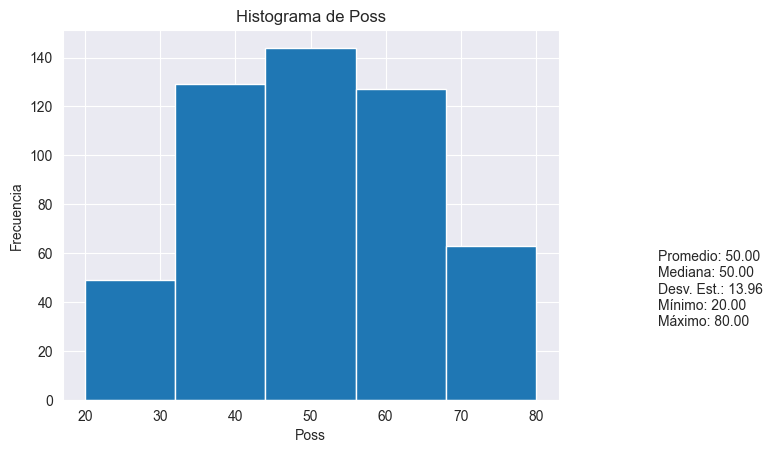

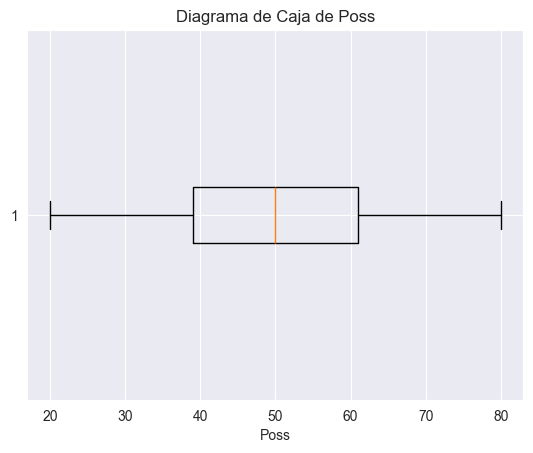

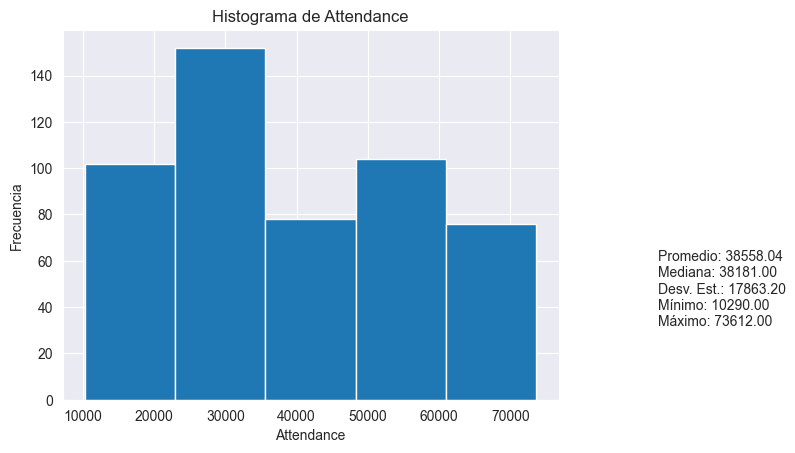

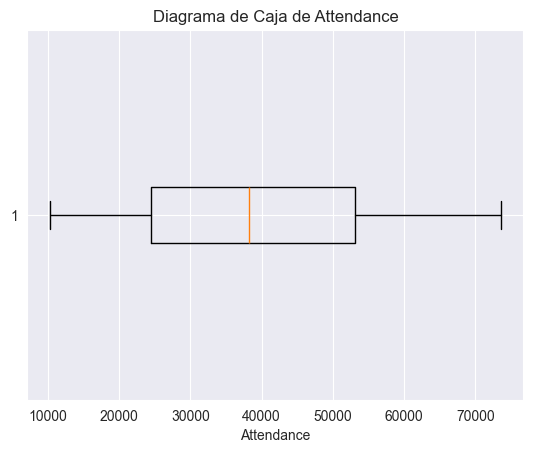

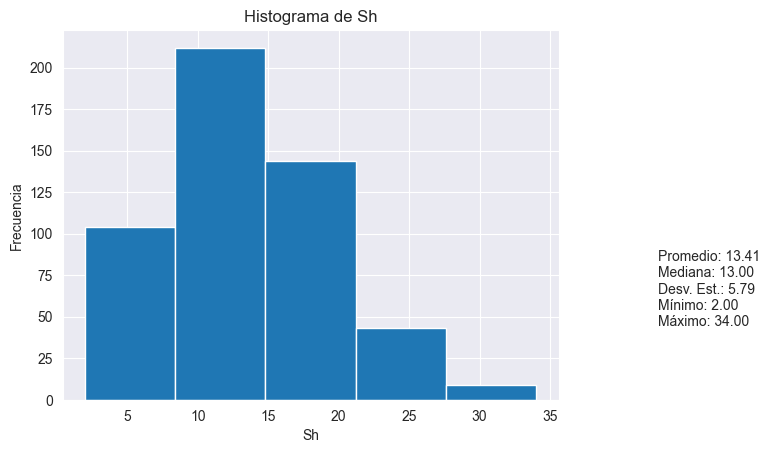

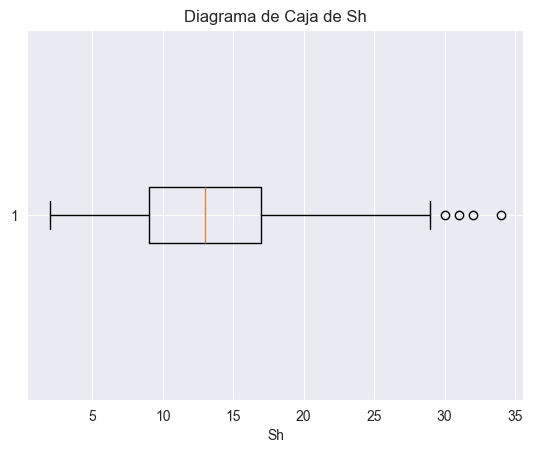

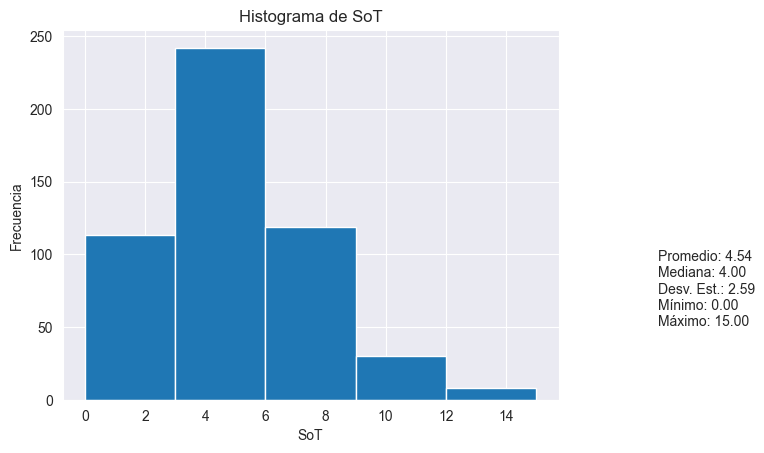

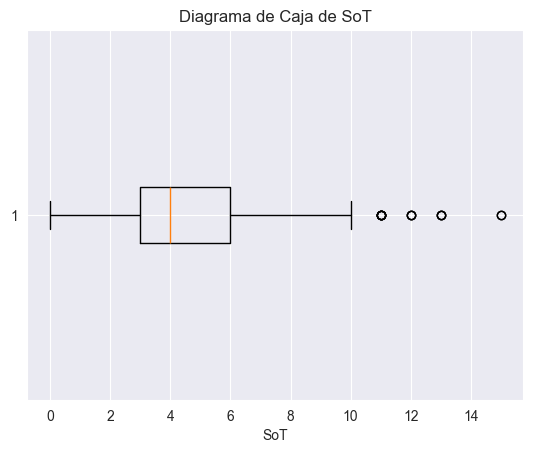

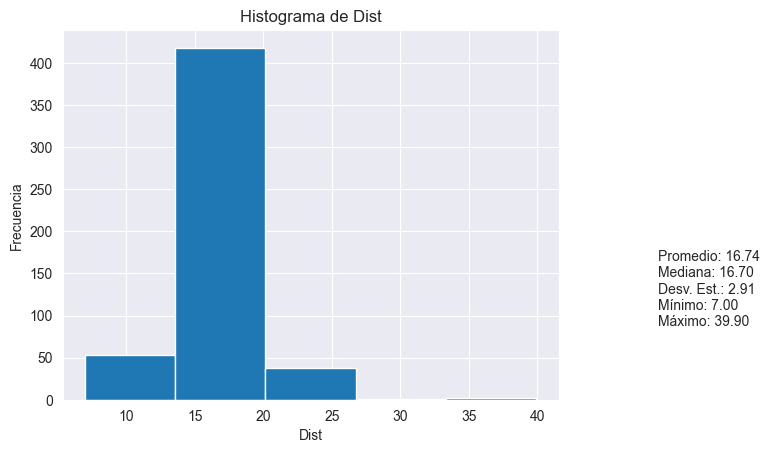

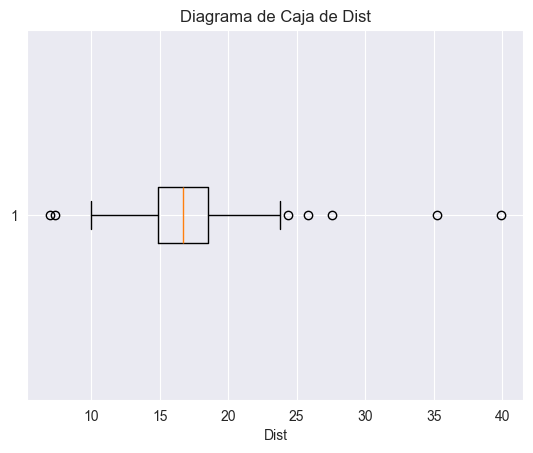

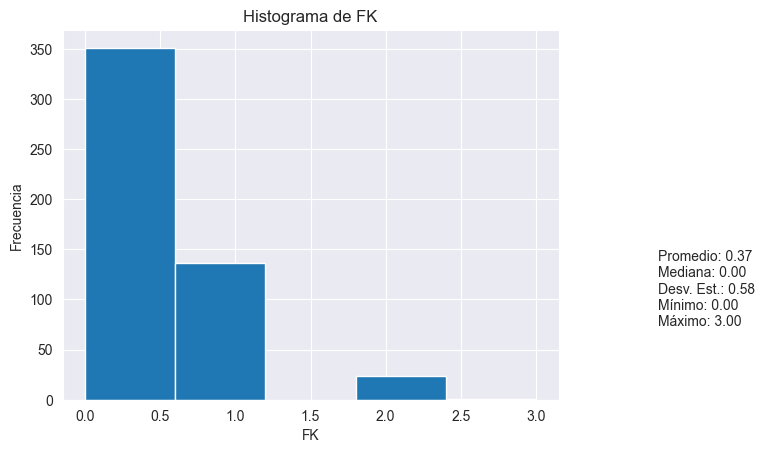

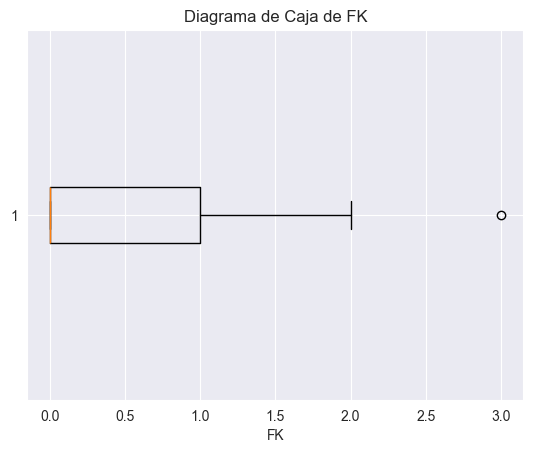

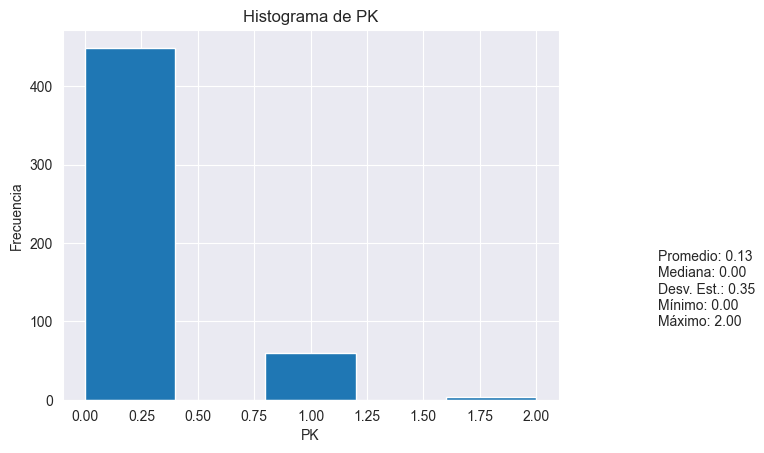

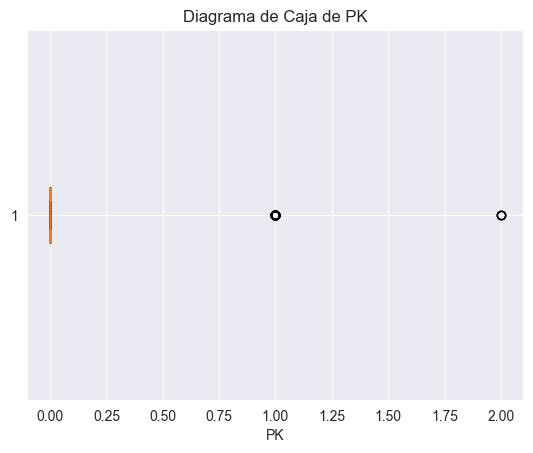

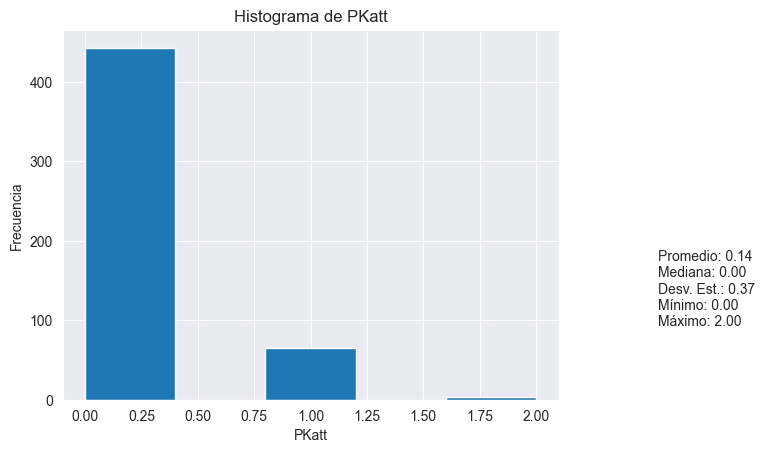

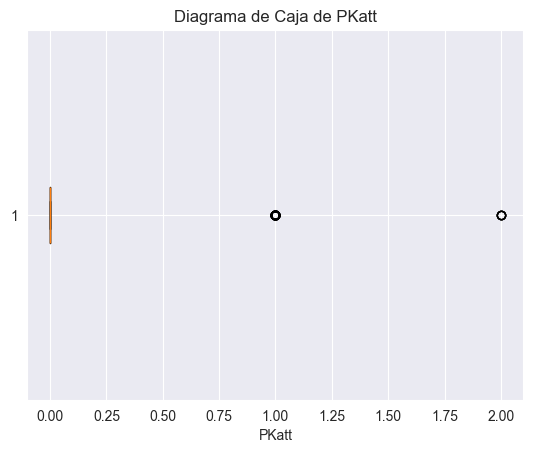

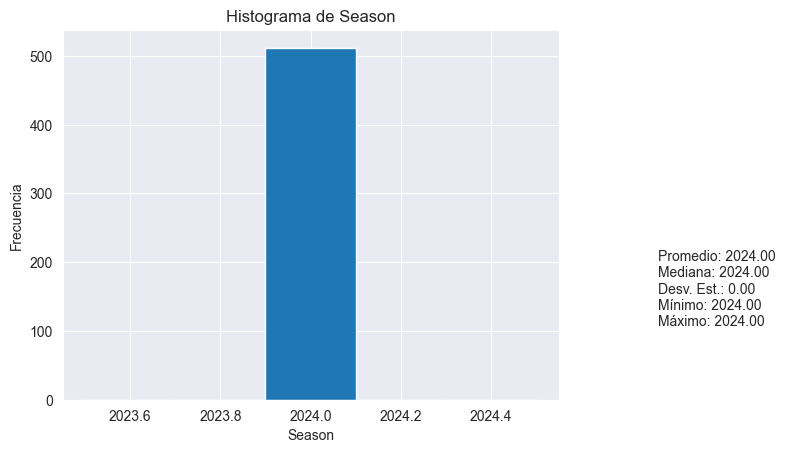

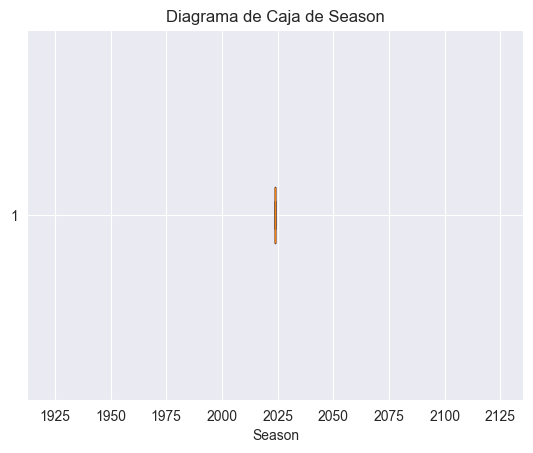

In [16]:
#gráficos variables
for var in df_numerico:
    # Graficamos el histograma
    plt.hist(df_numerico[var], bins=5)
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

    # Calculamos algunas medidas estadísticas de la variable
    var_mean = df_numerico[var].mean()
    var_median = df_numerico[var].median()
    var_std = df_numerico[var].std()
    var_min = df_numerico[var].min()
    var_max = df_numerico[var].max()

    # Agregamos las medidas estadísticas al gráfico
    plt.text(1.20, 0.20,
             f"Promedio: {var_mean:.2f}\nMediana: {var_median:.2f}\nDesv. Est.: {var_std:.2f}\nMínimo: {var_min:.2f}\nMáximo: {var_max:.2f}",
             transform=plt.gca().transAxes)

    # Mostramos el gráfico
    plt.show()

    # Graficamos el diagrama de caja
    plt.boxplot(df_numerico[var], vert=False)
    plt.title(f'Diagrama de Caja de {var}')
    plt.xlabel(var)

    # Mostramos el gráfico
    plt.show()

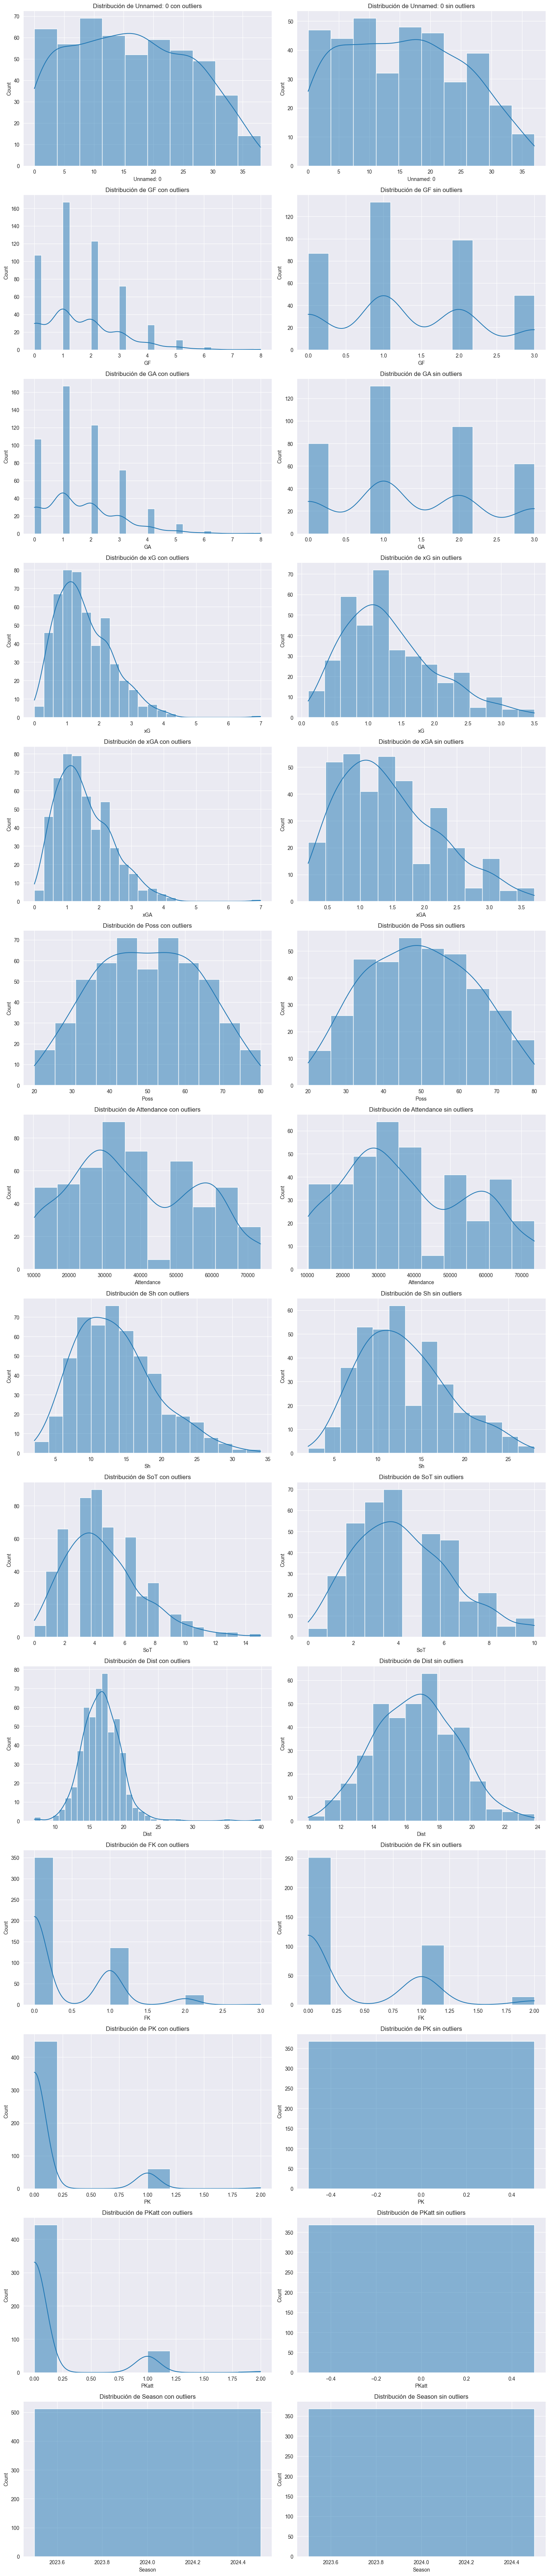

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def remove_outliers(df, threshold=1.5):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[((df >= lower_bound) & (df <= upper_bound)).all(axis=1)]


def plot_distribution_comparison(df_orig, df_sin_outliers):
    plt.figure(figsize=(15, 5 * len(df_orig.columns)))
    for i, columna in enumerate(df_orig.columns):
        if pd.api.types.is_numeric_dtype(df_orig[columna]):
            plt.subplot(len(df_orig.columns), 2, i*2 + 1)
            sns.histplot(df_orig[columna], kde=True)
            plt.title(f'Distribución de {columna} con outliers')

            plt.subplot(len(df_orig.columns), 2, i*2 + 2)
            sns.histplot(df_sin_outliers[columna], kde=True)
            plt.title(f'Distribución de {columna} sin outliers')

    plt.tight_layout()
    plt.show()

df_num_copy=df_numerico.copy()
df_sin_outliers = remove_outliers(df_num_copy)
plot_distribution_comparison(df_numerico, df_sin_outliers)

### Eliminación de variables a partir de apreciación


In [18]:
drop= ['Unnamed: 0', 'Date', 'Time', 'Comp', 'Round', 'Day' ,'GF','GA', 'Poss', 'Attendance', 'Captain', 'Formation', 'Match Report','Sh', 'SoT', 'Dist', 'FK', 'PK', 'PKatt', 'Season']

df= df.drop(drop, axis=1)

In [19]:
df.head()

,Venue,Result,Opponent,xG,xGA,Referee,Team
0,Away,D,Chelsea,1.3,1.4,Anthony Taylor,Liverpool
1,Home,W,Bournemouth,3.0,1.3,Thomas Bramall,Liverpool
2,Away,W,Newcastle Utd,0.9,2.0,John Brooks,Liverpool
3,Home,W,Aston Villa,2.5,0.7,Simon Hooper,Liverpool
4,Away,W,Wolves,2.5,0.6,Michael Oliver,Liverpool


In [20]:
df['Result'].replace("D","0",inplace=True)
df['Result'].replace("W","1",inplace=True)
df['Result'].replace("L","2",inplace=True)


In [21]:
df.to_csv('../data/processed/df_final.csv', index=False)


In [22]:
df.head(60)

,Venue,Result,Opponent,xG,xGA,Referee,Team
0,Away,0,Chelsea,1.3,1.4,Anthony Taylor,Liverpool
1,Home,1,Bournemouth,3.0,1.3,Thomas Bramall,Liverpool
2,Away,1,Newcastle Utd,0.9,2.0,John Brooks,Liverpool
3,Home,1,Aston Villa,2.5,0.7,Simon Hooper,Liverpool
4,Away,1,Wolves,2.5,0.6,Michael Oliver,Liverpool
5,Home,1,West Ham,3.0,1.1,Chris Kavanagh,Liverpool
6,Away,2,Tottenham,1.3,2.2,Simon Hooper,Liverpool
7,Away,0,Brighton,2.3,2.3,Anthony Taylor,Liverpool
8,Home,1,Everton,2.2,0.1,Craig Pawson,Liverpool
9,Home,1,Nott'ham Forest,3.2,0.4,Chris Kavanagh,Liverpool


In [23]:
df['Team'].value_counts()

Team
Liverpool                 26
NewcastleUnited           26
Burnley                   26
Everton                   26
CrystalPalace             26
Fulham                    26
ManchesterCity            26
SheffieldUnited           26
WolverhamptonWanderers    26
BrightonandHoveAlbion     26
ManchesterUnited          26
Arsenal                   26
WestHamUnited             25
TottenhamHotspur          25
Bournemouth               25
Brentford                 25
NottinghamForest          25
AstonVilla                25
LutonTown                 25
Chelsea                   25
Name: count, dtype: int64

In [27]:
df['Opponent'].value_counts()


Opponent
Liverpool          26
Manchester City    26
Newcastle Utd      26
Burnley            26
Wolves             26
Arsenal            26
Manchester Utd     26
Brighton           26
Everton            26
Crystal Palace     26
Sheffield Utd      26
Fulham             26
Chelsea            25
Brentford          25
Bournemouth        25
Nott'ham Forest    25
Tottenham          25
West Ham           25
Aston Villa        25
Luton Town         25
Name: count, dtype: int64

In [24]:
df['Referee'].value_counts()

Referee
Anthony Taylor       38
Michael Oliver       34
Paul Tierney         34
Andy Madley          32
Tim Robinson         32
John Brooks          30
Simon Hooper         30
Robert Jones         30
Chris Kavanagh       28
Jarred Gillett       26
Craig Pawson         24
Stuart Attwell       24
Samuel Barrott       22
David Coote          22
Michael Salisbury    20
Peter Bankes         20
Thomas Bramall       16
Darren England       12
Joshua Smith          8
Tony Harrington       8
Darren Bond           6
Lewis Smith           4
Graham Scott          4
Rebecca Welch         4
Robert Madley         2
Samuel Allison        2
Name: count, dtype: int64

In [25]:
df['xG'].value_counts()

xG
1.0    29
1.1    28
1.3    27
1.2    26
1.4    26
0.7    25
0.9    23
2.2    23
0.6    23
1.5    20
1.8    20
1.7    19
0.8    19
0.5    19
1.6    18
2.3    18
2.4    15
0.3    15
1.9    13
2.1    13
0.4    12
2.9    12
2.6     7
2.5     7
2.8     6
3.0     6
2.0     6
3.3     5
3.1     5
3.5     4
3.2     4
0.2     3
4.0     2
2.7     2
3.6     2
4.1     2
0.1     2
3.4     1
3.8     1
7.0     1
3.9     1
3.7     1
0.0     1
Name: count, dtype: int64

In [26]:
df['xGA'].value_counts()

xGA
1.0    29
1.1    28
1.3    27
1.4    26
1.2    26
0.7    25
0.6    23
2.2    23
0.9    23
1.5    20
1.8    20
1.7    19
0.5    19
0.8    19
1.6    18
2.3    18
0.3    15
2.4    15
1.9    13
2.1    13
0.4    12
2.9    12
2.5     7
2.6     7
2.8     6
3.0     6
2.0     6
3.3     5
3.1     5
3.2     4
3.5     4
0.2     3
4.1     2
4.0     2
0.1     2
2.7     2
3.6     2
3.4     1
3.7     1
0.0     1
7.0     1
3.8     1
3.9     1
Name: count, dtype: int64

## Data Wrangling:

Los datos de 514 filas y 27 columnas, al observar los valores nulos de nuestro data set observamos que la columna notas está vacía ya que tiene 514 valores nulos, ya que no nos aporta nada de información esta se elimina. Tenemos dos valores nulos en attendance, ya que son muy pocos, se eliminan ya que no causará cambios en la distrubución de los datos. Dejamos los datos atípicos ya que no afectan en la distribución de la mayoría de las variables, como podemos ver en los gráficos anteriores.
